In [ ]:
print('ACIT 4610, Portfolio-2024')
print('\nGroup-13')
print('\nparticipate: Thomas, M khan, Harith')

In [642]:
print('Tools and Libraries:')
print('\n1- Python 3.')
print('\n2- OpenAI Gym for the environment.')
print('\n3- Deep to use Genetic Programming, implement an evolutionary algorithms.')
print('\n4- NumPy for numerical computations.')
print('\n5- pandas for data manipulation and analysis.')
print('\n6- requests for the process of sending and receiving data from websites.')
print('\n7- Matplotlib for plotting results.')
print('\n8- TensorFlow/PyTorch for more advanced RL algorithms like DQN.')
print('\n9- pymoo for for multi-objective optimization algorithms.')
print('\n10-Keras for the convenience of mathematical calculations')

!pip3 freeze
!pip3 install gym numpy tensorflow keras openAi matplotlib requests pandas gym deap pymoo

import sys
print('System version',sys.version)

Tools and Libraries:

1- Python 3.

2- OpenAI Gym for the environment.

3- Deep to use Genetic Programming, implement an evolutionary algorithms.

4- NumPy for numerical computations.

5- pandas for data manipulation and analysis.

6- requests for the process of sending and receiving data from websites.

7- Matplotlib for plotting results.

8- TensorFlow/PyTorch for more advanced RL algorithms like DQN.

9- pymoo for for multi-objective optimization algorithms.

10-Keras for the convenience of mathematical calculations
about-time==4.2.1
alive-progress==3.1.5
asttokens==2.4.1
autograd==1.7.0
beautifulsoup4==4.12.3
certifi==2024.8.30
charset-normalizer==3.4.0
cloudpickle==3.1.0
cma==3.2.2
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
deap==1.4.1
debugpy==1.8.7
decorator==5.1.1
Deprecated==1.2.14
dill==0.3.9
executing==2.1.0
Farama-Notifications==0.0.4
fonttools==4.54.1
frozendict==2.4.6
grapheme==0.6.0
gymnasium==1.0.0
html5lib==1.1
idna==3.10
ipykernel==6.29.5
ipython==8.2

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow



  Using cached gym-0.26.2.tar.gz (721 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


Problem 3: Solving the Vehicle Routing Problem with Time Windows (VRPTW) Using 
Ant Colony Optimization (ACO) and Particle Swarm Optimization (PSO)

Overview 
This exercise focuses on optimizing the delivery routes for a fleet of vehicles using two nature
inspired optimization algorithms: Ant Colony Optimization (ACO) and Particle Swarm 
Optimization (PSO). The objective is to find the most efficient routes for a set of vehicles, 
ensuring that all customers receive their deliveries within specified time windows. You will 
implement both ACO and PSO to solve the Vehicle Routing Problem with Time Windows 
(VRPTW) and compare the effectiveness of these algorithms. 

Problem Description 
The VRPTW is a variant of the Vehicle Routing Problem (VRP), which is crucial in logistics, 
transportation, and supply chain management. In VRPTW, a fleet of vehicles must deliver 
goods to multiple customers. Each customer has a specific time window during which the 
delivery must occur. The challenge is to design routes that minimize the total travel distance 
while ensuring all deliveries meet their respective time constraints.

The primary objective of the VRPTW is to minimize the total distance travelled by all vehicles 
while ensuring that: 
1. Each customer is visited exactly once by one vehicle. 
2. Deliveries occur within the specified time windows. 
3. The total demand on any route does not exceed the vehicle's capacity. 

Key Components 
• Depot: The starting and ending point for all vehicles. 
• Customers: Each customer has a location, a demand for goods, a time window for 
receiving the delivery, and a service time. 
• Vehicles: Each vehicle has a limited capacity and must return to the depot after 
completing its route. 

Detailed Instructions

1. Problem Formulation: 
* Define the VRPTW for the chosen dataset, ensuring clear identification of 
constraints (e.g., time windows, vehicle capacity). 
* Formulate the objective function that minimizes total travel distance while 
penalizing violations of time windows. 

To Define the VRPTW for this problem, we need to define several key aspects:
1. Routes.
2. City_coordinates
3. Time Windows: Each city has a specific time window during which it must be visited.
4. violations (time window and capacity)
5. Dist matrix
6. Vehicle Capacity: Each vehicle can carry a limited amount of load.
7. Addition variable, num_ants, num_iterations, alpha, beta, rho, Q.

1. To defince the Routes, we need to ipmort the dataset. In this case we using dataset named c101.txt from http://web.cba.neu.edu/~msolomon/c101.htm.


The columns dataset are:

CUST NO.: Customer number (ID)
XCOORD: X coordinate of the customer's location
YCOORD: Y coordinate of the customer's location
DEMAND: The demand at the customer location (e.g., units of product or service required)
READY TIME: The earliest time at which service can begin
DUE DATE: The latest time by which the service should be completed
SERVICE TIME: The time it takes to complete the service for this customer


In [695]:
import csv
from io import StringIO

# Original data string
data = """CUST NO.,XCOORD,YCOORD,DEMAND,READY TIME,DUE DATE,SERVICE TIME
1,40.00,50.00,0.00,0.00,1236.00,0.00
2,45.00,68.00,10.00,912.00,967.00,90.00
3,45.00,70.00,30.00,825.00,870.00,90.00
4,42.00,66.00,10.00,65.00,146.00,90.00
5,42.00,68.00,10.00,727.00,782.00,90.00
6,42.00,65.00,10.00,15.00,67.00,90.00
7,40.00,69.00,20.00,621.00,702.00,90.00
8,40.00,66.00,20.00,170.00,225.00,90.00
9,38.00,68.00,20.00,255.00,324.00,90.00
10,38.00,70.00,10.00,534.00,605.00,90.00
11,35.00,66.00,10.00,357.00,410.00,90.00
12,35.00,69.00,10.00,448.00,505.00,90.00
13,25.00,85.00,20.00,652.00,721.00,90.00
14,22.00,75.00,30.00,30.00,92.00,90.00
15,22.00,85.00,10.00,567.00,620.00,90.00
16,20.00,80.00,40.00,384.00,429.00,90.00
17,20.00,85.00,40.00,475.00,528.00,90.00
18,18.00,75.00,20.00,99.00,148.00,90.00
19,15.00,75.00,20.00,179.00,254.00,90.00
20,15.00,80.00,10.00,278.00,345.00,90.00
21,30.00,50.00,10.00,10.00,73.00,90.00
22,30.00,52.00,20.00,914.00,965.00,90.00
23,28.00,52.00,20.00,812.00,883.00,90.00
24,28.00,55.00,10.00,732.00,777.00,90.00
25,25.00,50.00,10.00,65.00,144.00,90.00
"""

# Convert the string to a file-like object using StringIO
file_like_object = StringIO(data)

# Read the data into a list of dictionaries
reader = csv.DictReader(file_like_object)

# Store the data in a list, with type conversion
routs_data = []
for row in reader:
    routs_data.append({
        'CUST NO.': int(row['CUST NO.']),
        'XCOORD': float(row['XCOORD']),
        'YCOORD': float(row['YCOORD']),
        'DEMAND': float(row['DEMAND']),
        'READY TIME': float(row['READY TIME']),
        'DUE DATE': float(row['DUE DATE']),
        'SERVICE TIME': float(row['SERVICE TIME'])
    })

# Specify the output CSV file
output_filename = 'dataset.csv'

# Write the list of dictionaries back to a CSV file
with open(output_filename, mode='w', newline='') as file:
    # Create a CSV DictWriter
    fieldnames = ['CUST NO.', 'XCOORD', 'YCOORD', 'DEMAND', 'READY TIME', 'DUE DATE', 'SERVICE TIME']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write the rows
    writer.writerows(routs_data)

print(f"Data has been written to {output_filename}")



Data has been written to dataset.csv


In [696]:
import csv

# Specify the CSV file name
input_filename = 'dataset.csv'

# Open the CSV file and read data
with open(input_filename, mode='r', newline='') as file:
    reader = csv.reader(file)
    
    # Read and print the header (first row)
    header = next(reader)
    print("Header:", header)
    
    # Read and print all rows
    for row in reader:
        print(row)


Header: ['CUST NO.', 'XCOORD', 'YCOORD', 'DEMAND', 'READY TIME', 'DUE DATE', 'SERVICE TIME']
['1', '40.0', '50.0', '0.0', '0.0', '1236.0', '0.0']
['2', '45.0', '68.0', '10.0', '912.0', '967.0', '90.0']
['3', '45.0', '70.0', '30.0', '825.0', '870.0', '90.0']
['4', '42.0', '66.0', '10.0', '65.0', '146.0', '90.0']
['5', '42.0', '68.0', '10.0', '727.0', '782.0', '90.0']
['6', '42.0', '65.0', '10.0', '15.0', '67.0', '90.0']
['7', '40.0', '69.0', '20.0', '621.0', '702.0', '90.0']
['8', '40.0', '66.0', '20.0', '170.0', '225.0', '90.0']
['9', '38.0', '68.0', '20.0', '255.0', '324.0', '90.0']
['10', '38.0', '70.0', '10.0', '534.0', '605.0', '90.0']
['11', '35.0', '66.0', '10.0', '357.0', '410.0', '90.0']
['12', '35.0', '69.0', '10.0', '448.0', '505.0', '90.0']
['13', '25.0', '85.0', '20.0', '652.0', '721.0', '90.0']
['14', '22.0', '75.0', '30.0', '30.0', '92.0', '90.0']
['15', '22.0', '85.0', '10.0', '567.0', '620.0', '90.0']
['16', '20.0', '80.0', '40.0', '384.0', '429.0', '90.0']
['17', '20.0

In [691]:
print("Routes data", routs_data)

Routes data [{'CUST NO.': 1, 'XCOORD': 40.0, 'YCOORD': 50.0, 'DEMAND': 0.0, 'READY TIME': 0.0, 'DUE DATE': 1236.0, 'SERVICE TIME': 0.0}, {'CUST NO.': 2, 'XCOORD': 45.0, 'YCOORD': 68.0, 'DEMAND': 10.0, 'READY TIME': 912.0, 'DUE DATE': 967.0, 'SERVICE TIME': 90.0}, {'CUST NO.': 3, 'XCOORD': 45.0, 'YCOORD': 70.0, 'DEMAND': 30.0, 'READY TIME': 825.0, 'DUE DATE': 870.0, 'SERVICE TIME': 90.0}, {'CUST NO.': 4, 'XCOORD': 42.0, 'YCOORD': 66.0, 'DEMAND': 10.0, 'READY TIME': 65.0, 'DUE DATE': 146.0, 'SERVICE TIME': 90.0}, {'CUST NO.': 5, 'XCOORD': 42.0, 'YCOORD': 68.0, 'DEMAND': 10.0, 'READY TIME': 727.0, 'DUE DATE': 782.0, 'SERVICE TIME': 90.0}, {'CUST NO.': 6, 'XCOORD': 42.0, 'YCOORD': 65.0, 'DEMAND': 10.0, 'READY TIME': 15.0, 'DUE DATE': 67.0, 'SERVICE TIME': 90.0}, {'CUST NO.': 7, 'XCOORD': 40.0, 'YCOORD': 69.0, 'DEMAND': 20.0, 'READY TIME': 621.0, 'DUE DATE': 702.0, 'SERVICE TIME': 90.0}, {'CUST NO.': 8, 'XCOORD': 40.0, 'YCOORD': 66.0, 'DEMAND': 20.0, 'READY TIME': 170.0, 'DUE DATE': 225.0, 

2. Time Windows: Each customer has a specific time window which it must be visited.
The dataset format 

In [720]:
import csv

# Define the path of dataset
file_path = 'dataset.csv' 

# Open the file and read its content
time_windows = []  # List to store time windows

with open(file_path, mode='r') as file:
    reader = csv.DictReader(file)
    
    # Collect time windows for each customer
    for row in reader:
        customer_no = int(row['CUST NO.'])
        ready_time = float(row['READY TIME'])
        due_date = float(row['DUE DATE'])
        
        # Append the customer time window as a tuple or dictionary to the list
        time_windows.append({
            'CUST NO.': customer_no,
            'TIME WINDOW': (ready_time, due_date)
        })

# Output the list of time windows
print(time_windows)


[{'CUST NO.': 1, 'TIME WINDOW': (0.0, 1236.0)}, {'CUST NO.': 2, 'TIME WINDOW': (912.0, 967.0)}, {'CUST NO.': 3, 'TIME WINDOW': (825.0, 870.0)}, {'CUST NO.': 4, 'TIME WINDOW': (65.0, 146.0)}, {'CUST NO.': 5, 'TIME WINDOW': (727.0, 782.0)}, {'CUST NO.': 6, 'TIME WINDOW': (15.0, 67.0)}, {'CUST NO.': 7, 'TIME WINDOW': (621.0, 702.0)}, {'CUST NO.': 8, 'TIME WINDOW': (170.0, 225.0)}, {'CUST NO.': 9, 'TIME WINDOW': (255.0, 324.0)}, {'CUST NO.': 10, 'TIME WINDOW': (534.0, 605.0)}, {'CUST NO.': 11, 'TIME WINDOW': (357.0, 410.0)}, {'CUST NO.': 12, 'TIME WINDOW': (448.0, 505.0)}, {'CUST NO.': 13, 'TIME WINDOW': (652.0, 721.0)}, {'CUST NO.': 14, 'TIME WINDOW': (30.0, 92.0)}, {'CUST NO.': 15, 'TIME WINDOW': (567.0, 620.0)}, {'CUST NO.': 16, 'TIME WINDOW': (384.0, 429.0)}, {'CUST NO.': 17, 'TIME WINDOW': (475.0, 528.0)}, {'CUST NO.': 18, 'TIME WINDOW': (99.0, 148.0)}, {'CUST NO.': 19, 'TIME WINDOW': (179.0, 254.0)}, {'CUST NO.': 20, 'TIME WINDOW': (278.0, 345.0)}, {'CUST NO.': 21, 'TIME WINDOW': (10

In [698]:
import csv

# Define the path of dataset
file_path = 'dataset.csv' 

# Open the file and read its content
with open(file_path, mode='r') as file:
    reader = csv.DictReader(file)
    
    # Print time window for each customer
    print("Customer Time Windows:")
    for row in reader:
        customer_no = int(row['CUST NO.'])
        ready_time = float(row['READY TIME'])
        due_date = float(row['DUE DATE'])
        
        # Print customer number and their time window
        print(f"Customer {customer_no} has time window: {ready_time} to {due_date}")


Customer Time Windows:
Customer 1 has time window: 0.0 to 1236.0
Customer 2 has time window: 912.0 to 967.0
Customer 3 has time window: 825.0 to 870.0
Customer 4 has time window: 65.0 to 146.0
Customer 5 has time window: 727.0 to 782.0
Customer 6 has time window: 15.0 to 67.0
Customer 7 has time window: 621.0 to 702.0
Customer 8 has time window: 170.0 to 225.0
Customer 9 has time window: 255.0 to 324.0
Customer 10 has time window: 534.0 to 605.0
Customer 11 has time window: 357.0 to 410.0
Customer 12 has time window: 448.0 to 505.0
Customer 13 has time window: 652.0 to 721.0
Customer 14 has time window: 30.0 to 92.0
Customer 15 has time window: 567.0 to 620.0
Customer 16 has time window: 384.0 to 429.0
Customer 17 has time window: 475.0 to 528.0
Customer 18 has time window: 99.0 to 148.0
Customer 19 has time window: 179.0 to 254.0
Customer 20 has time window: 278.0 to 345.0
Customer 21 has time window: 10.0 to 73.0
Customer 22 has time window: 914.0 to 965.0
Customer 23 has time window

3. City_coordinates

In [721]:
import csv

def get_city_coordinates(file_path):
    # List to store city coordinates (XCOORD, YCOORD) for each customer
    city_coordinates = []

    # Open the file at the specified file path
    with open(file_path, mode='r', newline='') as file:
        # Create a CSV reader
        reader = csv.DictReader(file)

        # Extract the city coordinates (XCOORD, YCOORD) for each customer
        for row in reader:
            customer_no = int(row['CUST NO.'])
            xcoord = float(row['XCOORD'])
            ycoord = float(row['YCOORD'])
            
            # Append the coordinates to the list
            city_coordinates.append({
                'CUST NO.': customer_no,
                'CITY COORDINATES': (xcoord, ycoord)
            })

    return city_coordinates

file_path = 'dataset.csv'  
city_coordinates = get_city_coordinates(file_path)

print(city_coordinates)


[{'CUST NO.': 1, 'CITY COORDINATES': (40.0, 50.0)}, {'CUST NO.': 2, 'CITY COORDINATES': (45.0, 68.0)}, {'CUST NO.': 3, 'CITY COORDINATES': (45.0, 70.0)}, {'CUST NO.': 4, 'CITY COORDINATES': (42.0, 66.0)}, {'CUST NO.': 5, 'CITY COORDINATES': (42.0, 68.0)}, {'CUST NO.': 6, 'CITY COORDINATES': (42.0, 65.0)}, {'CUST NO.': 7, 'CITY COORDINATES': (40.0, 69.0)}, {'CUST NO.': 8, 'CITY COORDINATES': (40.0, 66.0)}, {'CUST NO.': 9, 'CITY COORDINATES': (38.0, 68.0)}, {'CUST NO.': 10, 'CITY COORDINATES': (38.0, 70.0)}, {'CUST NO.': 11, 'CITY COORDINATES': (35.0, 66.0)}, {'CUST NO.': 12, 'CITY COORDINATES': (35.0, 69.0)}, {'CUST NO.': 13, 'CITY COORDINATES': (25.0, 85.0)}, {'CUST NO.': 14, 'CITY COORDINATES': (22.0, 75.0)}, {'CUST NO.': 15, 'CITY COORDINATES': (22.0, 85.0)}, {'CUST NO.': 16, 'CITY COORDINATES': (20.0, 80.0)}, {'CUST NO.': 17, 'CITY COORDINATES': (20.0, 85.0)}, {'CUST NO.': 18, 'CITY COORDINATES': (18.0, 75.0)}, {'CUST NO.': 19, 'CITY COORDINATES': (15.0, 75.0)}, {'CUST NO.': 20, 'CI

In [706]:
print(city_coordinates)

[{'CUST NO.': 1, 'CITY COORDINATES': (40.0, 50.0)}, {'CUST NO.': 2, 'CITY COORDINATES': (45.0, 68.0)}, {'CUST NO.': 3, 'CITY COORDINATES': (45.0, 70.0)}, {'CUST NO.': 4, 'CITY COORDINATES': (42.0, 66.0)}, {'CUST NO.': 5, 'CITY COORDINATES': (42.0, 68.0)}, {'CUST NO.': 6, 'CITY COORDINATES': (42.0, 65.0)}, {'CUST NO.': 7, 'CITY COORDINATES': (40.0, 69.0)}, {'CUST NO.': 8, 'CITY COORDINATES': (40.0, 66.0)}, {'CUST NO.': 9, 'CITY COORDINATES': (38.0, 68.0)}, {'CUST NO.': 10, 'CITY COORDINATES': (38.0, 70.0)}, {'CUST NO.': 11, 'CITY COORDINATES': (35.0, 66.0)}, {'CUST NO.': 12, 'CITY COORDINATES': (35.0, 69.0)}, {'CUST NO.': 13, 'CITY COORDINATES': (25.0, 85.0)}, {'CUST NO.': 14, 'CITY COORDINATES': (22.0, 75.0)}, {'CUST NO.': 15, 'CITY COORDINATES': (22.0, 85.0)}, {'CUST NO.': 16, 'CITY COORDINATES': (20.0, 80.0)}, {'CUST NO.': 17, 'CITY COORDINATES': (20.0, 85.0)}, {'CUST NO.': 18, 'CITY COORDINATES': (18.0, 75.0)}, {'CUST NO.': 19, 'CITY COORDINATES': (15.0, 75.0)}, {'CUST NO.': 20, 'CI

Analyse the routes, Time Windows, and city time windows

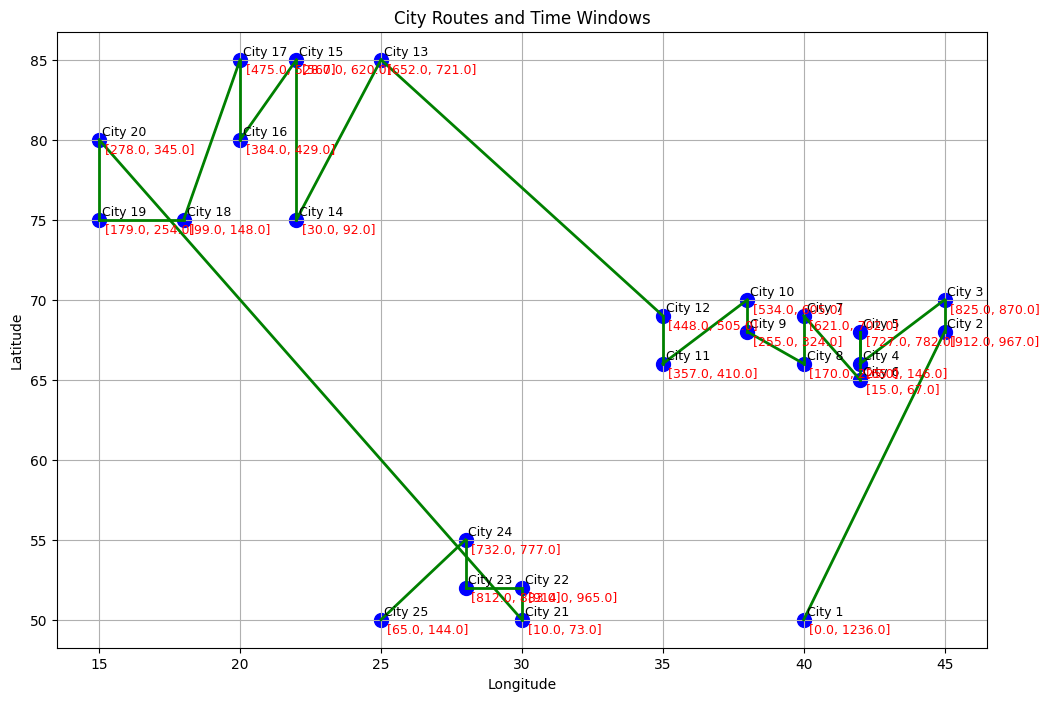

In [714]:
import matplotlib.pyplot as plt

# City coordinates
city_coordinates = city_coordinates

# Time windows for each customer
time_windows = time_windows
# Routes data
routes = routs_data

# Convert city_coordinates and time_windows to dictionaries for easy lookup
city_coords_dict = {city['CUST NO.']: city['CITY COORDINATES'] for city in city_coordinates}
time_window_dict = {tw['CUST NO.']: tw['TIME WINDOW'] for tw in time_windows}

# Plotting the city coordinates, routes, and time windows
plt.figure(figsize=(12, 8))

# Plot the cities as points
for city in city_coordinates:
    x, y = city['CITY COORDINATES']
    plt.scatter(x, y, color='blue', s=100)
    plt.text(x + 0.1, y + 0.1, f'City {city["CUST NO."]}', fontsize=9, ha='left', va='bottom')

# Plot the routes (connect cities)
for i in range(1, len(routes)):
    city1 = routes[i-1]
    city2 = routes[i]
    x1, y1 = city1['XCOORD'], city1['YCOORD']
    x2, y2 = city2['XCOORD'], city2['YCOORD']
    plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=2)

# Annotate time windows for each route
for route in routes:
    x, y = route['XCOORD'], route['YCOORD']
    time_window = time_window_dict[route['CUST NO.']]
    plt.text(x + 0.2, y - 0.2, f'[{time_window[0]}, {time_window[1]}]', fontsize=9, ha='left', va='top', color='red')

# Labels and title
plt.title('City Routes and Time Windows')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.grid(True)
plt.show()


4. Dist matrix

In [726]:
import math

def calculate_dist_matrix(city_coordinates):
    # Extract coordinates from the list of dictionaries
    city_list = [entry['CITY COORDINATES'] for entry in city_coordinates]
    num_cities = len(city_list)
    
    # Initialize distance matrix with zero values
    dist_matrix = [[0 for _ in range(num_cities)] for _ in range(num_cities)]
    
    # Calculate Euclidean distance between each pair of cities
    for i in range(num_cities):
        for j in range(i + 1, num_cities):  # Use symmetry to avoid duplicate calculations
            lat1, lon1 = city_list[i]
            lat2, lon2 = city_list[j]
            
            # Calculate the Euclidean distance (simplified as straight-line distance on the surface)
            distance = math.sqrt((lat2 - lat1) ** 2 + (lon2 - lon1) ** 2)
            dist_matrix[i][j] = distance
            dist_matrix[j][i] = distance  # Symmetric matrix

    return dist_matrix

In [727]:
dist_matrix=calculate_dist_matrix(city_coordinates)

In [728]:
print(dist_matrix)

[[0, 18.681541692269406, 20.615528128088304, 16.1245154965971, 18.110770276274835, 15.132745950421556, 19.0, 16.0, 18.110770276274835, 20.09975124224178, 16.76305461424021, 19.6468827043885, 38.07886552931954, 30.805843601498726, 39.35733730830886, 36.05551275463989, 40.311288741492746, 33.301651610693426, 35.35533905932738, 39.05124837953327, 10.0, 10.198039027185569, 12.165525060596439, 13.0, 15.0], [18.681541692269406, 0, 2.0, 3.605551275463989, 3.0, 4.242640687119285, 5.0990195135927845, 5.385164807134504, 7.0, 7.280109889280518, 10.198039027185569, 10.04987562112089, 26.248809496813376, 24.041630560342615, 28.600699292150182, 27.730849247724095, 30.23243291566195, 27.892651361962706, 30.805843601498726, 32.31098884280702, 23.430749027719962, 21.93171219946131, 23.345235059857504, 21.400934559032695, 26.90724809414742], [20.615528128088304, 2.0, 0, 5.0, 3.605551275463989, 5.830951894845301, 5.0990195135927845, 6.4031242374328485, 7.280109889280518, 7.0, 10.770329614269007, 10.04987

5. Penalty calculation

In [752]:
def penalty_calculation(city_times, time_windows, penalty_factor):
    total_penalty = 0
    for i, arrival_time in enumerate(city_times):
        # Get the time window for the current city
        customer = time_windows[i]
        earliest, latest = customer['TIME WINDOW']  # Extract the time window tuple
        
        # Calculate penalty based on the arrival time
        if arrival_time < earliest:
            total_penalty += penalty_factor * (earliest - arrival_time)
        elif arrival_time > latest:
            total_penalty += penalty_factor * (arrival_time - latest)
    
    return total_penalty

6. Vehicle Capacity: Each vehicle can carry a limited amount of load.

In [731]:
vehicle_capacity= 10

7. num_ants=20, num_iterations=100, alpha=1.0, beta=2.0, rho=0.1, Q=100

In [734]:
# ACO Parameters
num_ants = 20           # Number of ants
num_iterations = 100    # Number of iterations
alpha = 1.0             # Influence of pheromone
beta = 2.0              # Influence of distance
rho = 0.1               # Pheromone evaporation rate
Q = 100                 # Total pheromone deposited by each ant


# PSO hyperparameters
num_particles = 20
num_iterations = 100
w=0.5, 
c1=1.5, 
c2=1.5

2. Algorithm Implementation:

To handle time windows efficiently, we need a function to calculate a penalty based on early or late arrivals.
1. Penalty Mechanism: If a vehicle arrives too early
2. Handling Early Arrival: If a vehicle arrives before the allowed time window
3. Handling Late Arrival: If a vehicle arrives after the time window


Updated Code with Penalty Calculation for Early or Late Arrivals

Approach:
1. Early Arrival: If the ant arrives before the city's start time, the ant has to wait. This does not incur a penalty, but we can track the waiting time if necessary.

Late Arrival: If the ant arrives after the city's end time, a penalty is applied. We will add a penalty based on how late the ant is, which could be a linear penalty proportional to the violation (e.g., 1 unit of penalty for each unit of time the ant is late).

A. Implement ACO Algorithm for defined VRPTW, with Penalty Calculation for Early or Late Arrivals

In [754]:

import time
import random
import time

class ACO:
    def __init__(self, num_ants, dist_matrix, time_windows, alpha=1.0, beta=2.0, rho=0.1, Q=100, penalty_factor=10):
        self.num_ants = num_ants
        self.dist_matrix = dist_matrix
        self.time_windows = time_windows  # List of dictionaries with time windows
        self.num_cities = len(time_windows)
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q
        self.penalty_factor = penalty_factor
        self.pheromones = [[1.0 for _ in range(self.num_cities)] for _ in range(self.num_cities)]
        self.best_global_position = None
        self.best_global_value = float('inf')
        self.violations_over_time = []  # Track violations over time (list of lists)
        self.total_distances = []  # Track total distances over time
        self.best_values = []  # Track the best fitness value over iterations

    def fitness(self, position):
        total_travel_time = 0
        city_times = [0] * self.num_cities  # To store arrival times at each city
        current_time = 0
        for i in range(self.num_cities - 1):
            city_from = position[i]
            city_to = position[i + 1]
            total_travel_time += self.dist_matrix[city_from][city_to]
            current_time += self.dist_matrix[city_from][city_to]
            city_times[i + 1] = current_time

        # Pass time windows as a list of dictionaries to the penalty function
        penalty = penalty_calculation(city_times, self.time_windows, self.penalty_factor)
        total_value = total_travel_time + penalty
        return total_travel_time, penalty, total_value

    def update_pheromones(self, ants_positions, ants_fitness):
        # Evaporate pheromones
        for i in range(self.num_cities):
            for j in range(self.num_cities):
                self.pheromones[i][j] *= (1 - self.rho)

        # Add pheromones based on fitness (inverse of fitness)
        for i in range(self.num_ants):
            fitness_value = ants_fitness[i]
            for j in range(self.num_cities - 1):
                self.pheromones[ants_positions[i][j]][ants_positions[i][j + 1]] += self.Q / (fitness_value + 1)

    def optimize(self, max_iterations=50):
        start_time = time.time()  # Start timer for convergence time
        for _ in range(max_iterations):
            iteration_distances = []  # Track distances for each iteration
            iteration_violations = []  # Track violations for each iteration
            ants_positions = []
            ants_fitness = []

            for ant in range(self.num_ants):
                # Generate a random solution (ant's path)
                position = random.sample(range(self.num_cities), self.num_cities)
                travel_time, penalty, total_value = self.fitness(position)
                ants_positions.append(position)
                ants_fitness.append(total_value)

                iteration_distances.append(travel_time)
                iteration_violations.append(penalty)

                # Update global best solution
                if total_value < self.best_global_value:
                    self.best_global_value = total_value
                    self.best_global_position = position

            # Store the results at this iteration
            self.total_distances.append(iteration_distances)
            self.violations_over_time.append(iteration_violations)
            self.best_values.append(self.best_global_value)

            # Update pheromones
            self.update_pheromones(ants_positions, ants_fitness)

        self.convergence_time = time.time() - start_time  # End timer
        return self.best_global_position, self.best_global_value, self.violations_over_time, self.total_distances  


In [755]:
# Run optimization
aco = ACO(num_ants=10, dist_matrix=dist_matrix, time_windows=time_windows)
best_solution, best_distance, best_fitness_values, violations_over_time = aco.optimize(max_iterations=50)

# Print results
print("Best Fitness Value (Total Cost + Penalty):", best_fitness_values[-1])
print("Violations Over Time:")
for i, violation in enumerate(violations_over_time):
    print(f"Iteration {i+1}: Total Violation = {sum(violation)}")


Best Fitness Value (Total Cost + Penalty): [75013.82314996667, 74750.8525259053, 69689.42529903528, 71065.11053376354, 69812.9658828024, 68805.29330796358, 69248.09817117159, 71271.30422994166, 70851.80121319859, 70111.42446828638]
Violations Over Time:
Iteration 1: Total Violation = 4427.604727881351
Iteration 2: Total Violation = 4505.184206769097
Iteration 3: Total Violation = 4456.335701301529
Iteration 4: Total Violation = 4471.280345593788
Iteration 5: Total Violation = 4403.721730801115
Iteration 6: Total Violation = 4576.47559091313
Iteration 7: Total Violation = 4450.961817664356
Iteration 8: Total Violation = 4356.722810572847
Iteration 9: Total Violation = 4335.694271549968
Iteration 10: Total Violation = 4287.51016629022
Iteration 11: Total Violation = 4331.147413085964
Iteration 12: Total Violation = 4617.6868634745715
Iteration 13: Total Violation = 4333.328391717083
Iteration 14: Total Violation = 4474.585812261444
Iteration 15: Total Violation = 4392.191744759344
Iterat

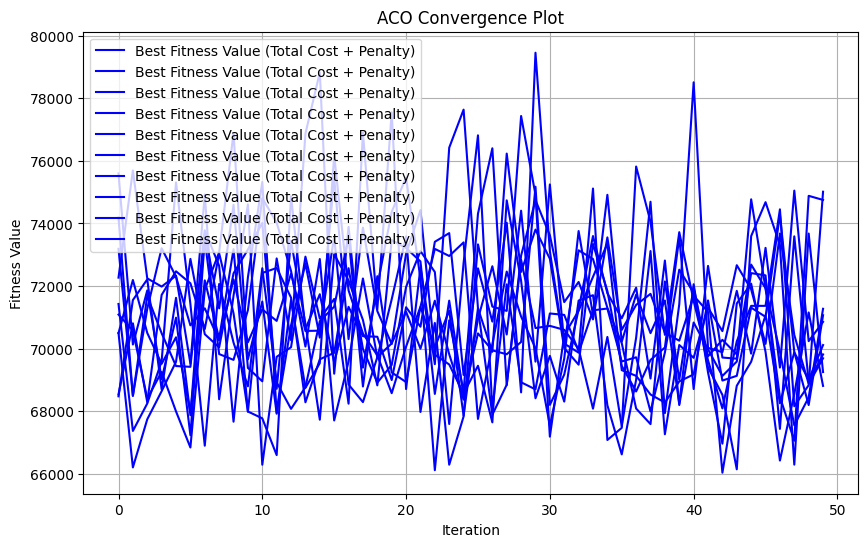

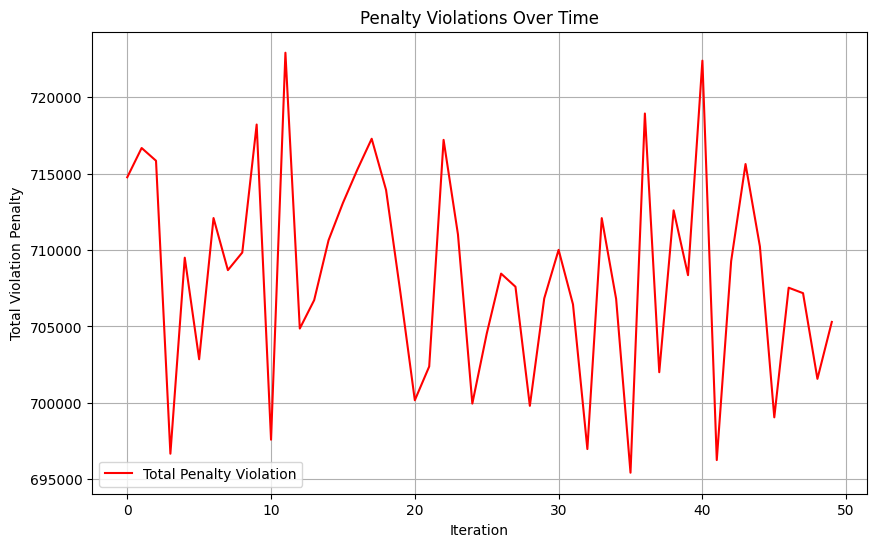

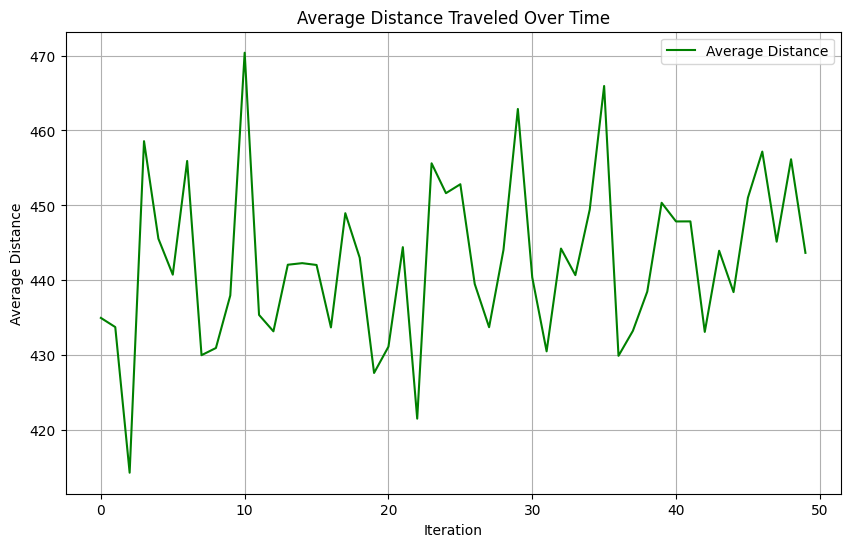

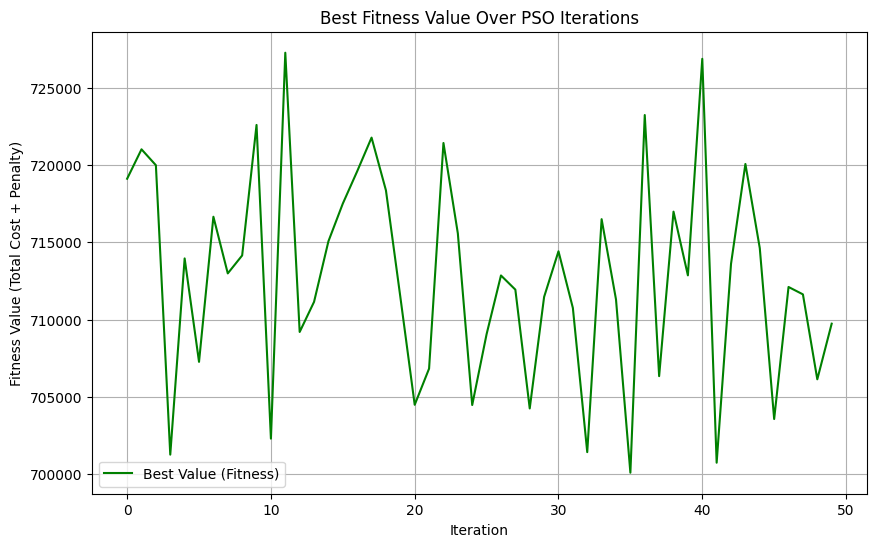

In [761]:
import matplotlib.pyplot as plt

def plot_convergence(best_fitness_values):
    """Plot the convergence of the best fitness value over iterations."""
    plt.figure(figsize=(10, 6))
    plt.plot(best_fitness_values, label="Best Fitness Value (Total Cost + Penalty)", color='b')
    plt.xlabel('Iteration')
    plt.ylabel('Fitness Value')
    plt.title('ACO Convergence Plot')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_violations(violations_over_time):
    """Plot the total violation penalties over iterations."""
    total_violations_per_iteration = [sum(violation) for violation in violations_over_time]
    
    plt.figure(figsize=(10, 6))
    plt.plot(total_violations_per_iteration, label="Total Penalty Violation", color='r')
    plt.xlabel('Iteration')
    plt.ylabel('Total Violation Penalty')
    plt.title('Penalty Violations Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_distances(total_distances):
    """Plot the total distances traveled by all ants over iterations."""
    avg_distances = [sum(distances) / len(distances) for distances in total_distances]
    
    plt.figure(figsize=(10, 6))
    plt.plot(avg_distances, label="Average Distance", color='g')
    plt.xlabel('Iteration')
    plt.ylabel('Average Distance')
    plt.title('Average Distance Traveled Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Assuming `best_values`, `violations_over_time`, and `total_distances` are already calculated
plot_convergence(best_fitness_values)
plot_violations(violations_over_time)
plot_distances(total_distances)
plot_best_value([sum(dist) + sum(viol) for dist, viol in zip(total_distances, violations_over_time)])






B. Implement PSO Algorithm for defined VRPTW, with Penalty Calculation for Early or Late Arrivals

In [757]:
import random
import math
import matplotlib.pyplot as plt
import time

# 2. PSO Algorithm
class PSO:
    def __init__(self, num_particles, dist_matrix, time_windows, penalty_factor=10, w=0.5, c1=1.5, c2=1.5):
        self.num_particles = num_particles
        self.dist_matrix = dist_matrix
        self.time_windows = time_windows
        self.num_cities = len(time_windows)  # Deriving number of cities from time windows
        self.penalty_factor = penalty_factor
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.particles = [self.create_particle() for _ in range(num_particles)]
        self.best_global_position = None
        self.best_global_value = float('inf')
        self.violations_over_time = []  # Track violations over time
        self.total_distances = []  # Track total distances over time
        self.convergence_time = 0  # Time taken to converge

    def create_particle(self):
        # A particle represents a possible tour (a permutation of cities)
        position = random.sample(range(self.num_cities), self.num_cities)  # Ensure valid city indices
        velocity = [random.uniform(-1, 1) for _ in range(self.num_cities)]
        return {
            'position': position,
            'velocity': velocity,
            'best_position': position,
            'best_value': float('inf')
        }

    def fitness(self, position):
        # Calculate total travel time and arrival times for each city
        total_travel_time = 0
        city_times = [0] * self.num_cities  # To store arrival times at each city
        
        # Starting from city 0
        current_time = 0
        for i in range(self.num_cities - 1):
            city_from = position[i]
            city_to = position[i + 1]
            
            # Ensure that city_from and city_to are within bounds of dist_matrix
            if city_from >= self.num_cities or city_to >= self.num_cities:
                raise ValueError(f"City index out of range: {city_from}, {city_to}")

            total_travel_time += self.dist_matrix[city_from][city_to]
            current_time += self.dist_matrix[city_from][city_to]
            city_times[i + 1] = current_time

        # Compute penalty based on arrival times and time windows
        penalty = penalty_calculation(city_times, self.time_windows, self.penalty_factor)
        return total_travel_time, penalty

    def update_velocity(self, particle):
        for i in range(self.num_cities):
            r1, r2 = random.random(), random.random()
            cognitive_term = self.c1 * r1 * (particle['best_position'][i] - particle['position'][i])
            social_term = self.c2 * r2 * (self.best_global_position[i] - particle['position'][i])
            particle['velocity'][i] = self.w * particle['velocity'][i] + cognitive_term + social_term

    def update_position(self, particle):
        # Generate a new position by swapping cities based on velocity (but keeping it a permutation)
        new_position = particle['position'][:]
        for i in range(self.num_cities):
            if random.random() < abs(particle['velocity'][i]):  # Only update with some probability
                swap_idx = random.randint(0, self.num_cities - 1)
                new_position[i], new_position[swap_idx] = new_position[swap_idx], new_position[i]
        
        particle['position'] = new_position

    def optimize(self, max_iterations=50):
        start_time = time.time()  # Start timer for convergence time
        for _ in range(max_iterations):
            iteration_distances = []  # Track distances for each iteration
            iteration_violations = []  # Track violations for each iteration

            for particle in self.particles:
                travel_time, penalty = self.fitness(particle['position'])
                total_value = travel_time + penalty
                iteration_distances.append(travel_time)
                iteration_violations.append(penalty)

                if total_value < particle['best_value']:
                    particle['best_value'] = total_value
                    particle['best_position'] = particle['position']

                if total_value < self.best_global_value:
                    self.best_global_value = total_value
                    self.best_global_position = particle['position']

            # Store the results at this iteration
            self.total_distances.append(iteration_distances)
            self.violations_over_time.append(iteration_violations)

            # Update particles' velocities and positions
            for particle in self.particles:
                self.update_velocity(particle)
                self.update_position(particle)

        self.convergence_time = time.time() - start_time  # End timer
        # Return best solution, best distance, violations, and total distances
        best_solution = self.best_global_position
        best_distance = sum(self.dist_matrix[best_solution[i]][best_solution[i + 1]] for i in range(self.num_cities - 1))
        return best_solution, best_distance, self.violations_over_time, self.total_distances

In [758]:
def plot_best_solution(best_solution):
    """
    This function will plot the best solution as a route on a 2D plane (using the cities' indices as coordinates).
    The route is represented as a list of city indices from best_solution.
    """
    x_coords = [i for i in range(len(best_solution))]  # Placeholder for x-coordinates (can be city positions)
    y_coords = [best_solution[i] for i in range(len(best_solution))]  # Placeholder for y-coordinates (can be city positions)

    # Plot the best solution
    best_solution_x = [x_coords[city] for city in best_solution]
    best_solution_y = [y_coords[city] for city in best_solution]

    plt.figure(figsize=(10, 6))
    plt.plot(best_solution_x, best_solution_y, marker='o', linestyle='-', color='b', label="Best Route")
    plt.title("Best Solution (Route) in PSO")
    plt.xlabel("City Index")
    plt.ylabel("City Position (as coordinate value)")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_total_distances(total_distances):
    """
    This function will plot the total distance at each iteration.
    The total distance is computed for each particle (or ant) in PSO.
    """
    plt.figure(figsize=(10, 6))
    plt.plot([sum(dist) for dist in total_distances], label='Total Distance (PSO)', color='orange')
    plt.title("Total Distance Over PSO Iterations")
    plt.xlabel('Iteration')
    plt.ylabel('Total Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_penalties(violations):
    """
    This function will plot the penalties (violations) over iterations.
    Penalties are calculated based on the time window violations.
    """
    plt.figure(figsize=(10, 6))
    plt.plot([sum(viol) for viol in violations], label='Penalties (PSO)', color='red')
    plt.title("Penalties Over PSO Iterations")
    plt.xlabel('Iteration')
    plt.ylabel('Penalties')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_best_value(best_values):
    """
    This function will plot the best value (fitness) over iterations. The best value corresponds to the solution's quality.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(best_values, label='Best Value (Fitness)', color='green')
    plt.title("Best Fitness Value Over PSO Iterations")
    plt.xlabel('Iteration')
    plt.ylabel('Fitness Value (Total Cost + Penalty)')
    plt.legend()
    plt.grid(True)
    plt.show()

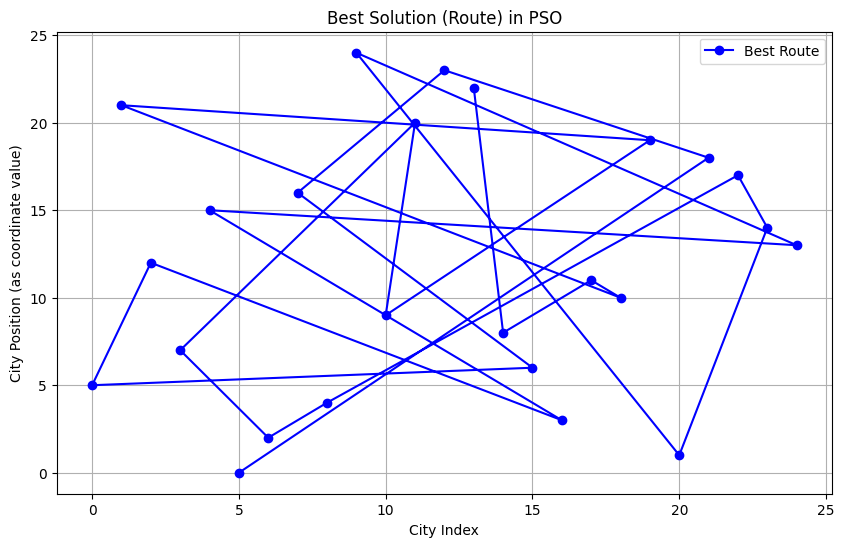

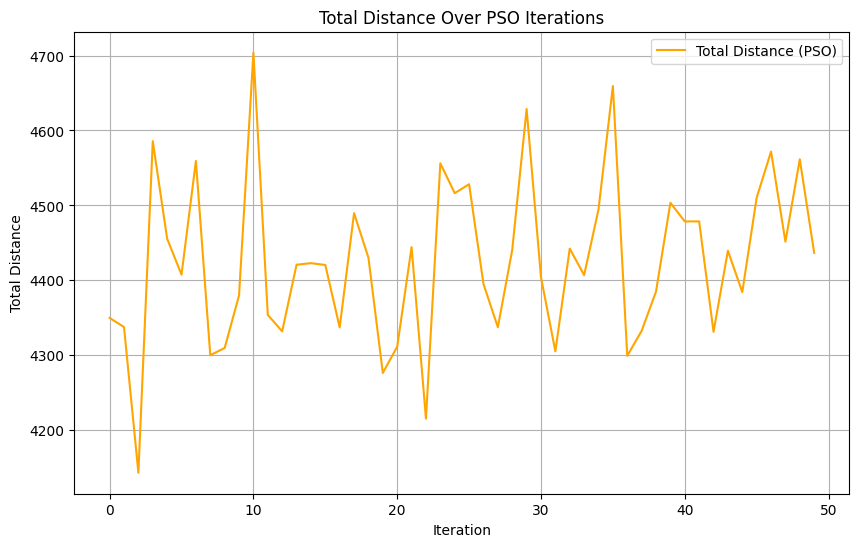

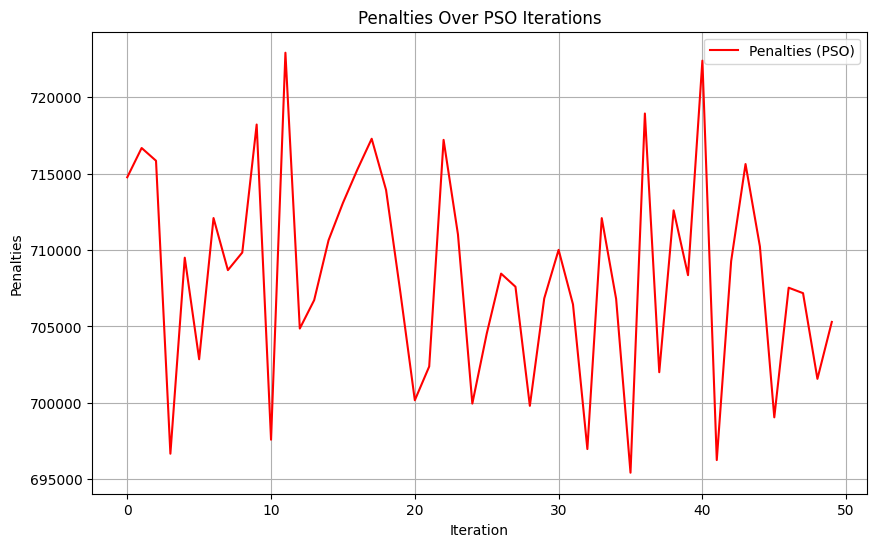

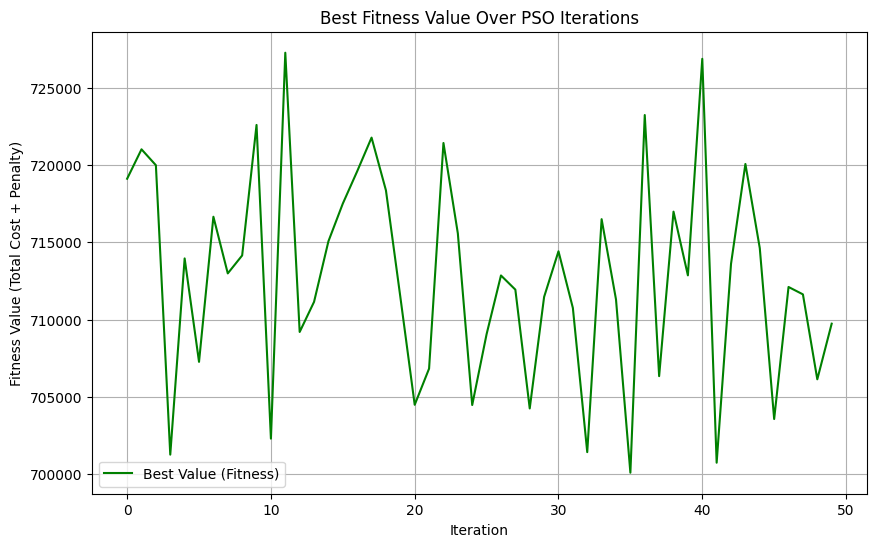

In [759]:
# Initialize PSO
pso = PSO(num_particles=10, dist_matrix=dist_matrix, time_windows=time_windows)

# Run optimization
best_solution, best_distance, violations_over_time, total_distances = pso.optimize(max_iterations=50)

# Plot results
plot_best_solution(best_solution)
plot_total_distances(total_distances)
plot_penalties(violations_over_time)
plot_best_value([sum(dist) + sum(viol) for dist, viol in zip(total_distances, violations_over_time)])